## 1. Импорт библиотек и создание функций

### 1.1. Библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### 1.2. Функции

In [2]:
def conf_matrix(fact, pred):
    conf_test = confusion_matrix(fact, pred, normalize='true')
    sns.heatmap(conf_test, annot=True, fmt='.2f', cmap='binary')
    plt.xlabel('Predicted', size=14)
    plt.ylabel('Actual', size=14)
    plt.show()

## 2. Импорт и предобработка данных

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [6]:
df.shape

(887, 8)

In [7]:
df.drop('Name', axis=1, inplace=True)

In [8]:
target = 'Survived'

In [9]:
data_types = df.dtypes

cat_features = data_types[data_types == 'object'].index.tolist()

In [10]:
num_features = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

num_features = [i for i in num_features if i != target]

## 3. Маленький разведочный анализ

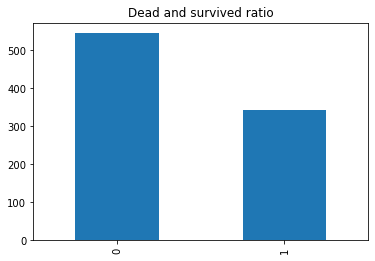

In [11]:
df[target].value_counts().plot.bar()
plt.title('Dead and survived ratio')
plt.show()

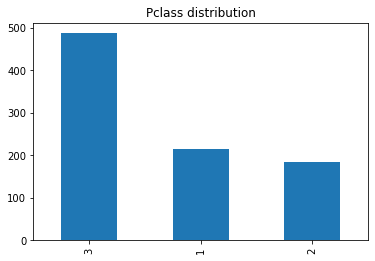

In [12]:
df['Pclass'].value_counts().plot.bar()
plt.title('Pclass distribution')
plt.show()

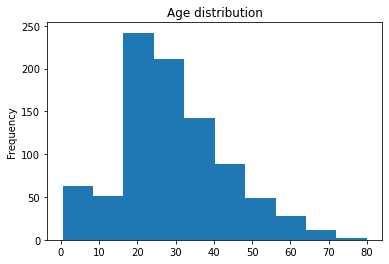

In [13]:
df['Age'].plot.hist()
plt.title('Age distribution')
plt.show()

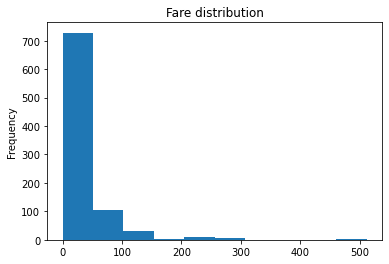

In [14]:
df['Fare'].plot.hist()
plt.title('Fare distribution')
plt.show()

## 4. Разбивка и обработка данных

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1), df[target],
    test_size=0.2,
    stratify=df[target],
    random_state=22)

In [16]:
transformer = ColumnTransformer(
    [('cat_trans', OneHotEncoder(), cat_features),
     ('num_trans', MinMaxScaler(), num_features)]
)

In [17]:
X_train = transformer.fit_transform(X_train)

In [18]:
X_test = transformer.transform(X_test)

## 5. Классификация с помощью KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_approx = knn.predict(X_train)

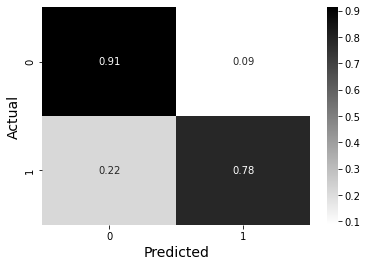

In [22]:
conf_matrix(y_train, y_approx)

In [23]:
knn_train_score = f1_score(y_train, y_approx)
knn_train_score

0.8152380952380952

In [24]:
y_pred = knn.predict(X_test)

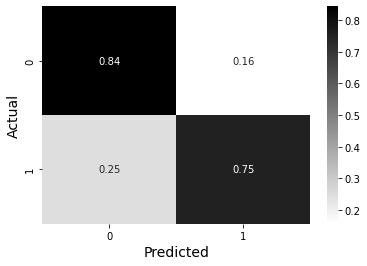

In [25]:
conf_matrix(y_test, y_pred)

In [26]:
knn_test_score = f1_score(y_test, y_pred)
knn_test_score

0.7536231884057971

## 6. Логистическая регрессия

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_approx = lr.predict(X_train)

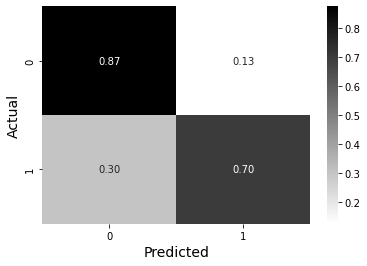

In [30]:
conf_matrix(y_train, y_approx)

In [31]:
lr_train_score = f1_score(y_train, y_approx)
lr_train_score

0.7360308285163776

In [32]:
y_pred = lr.predict(X_test)

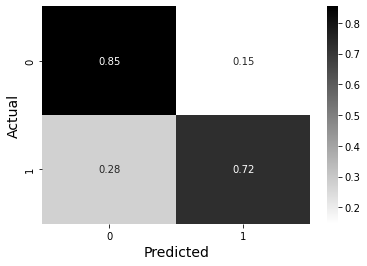

In [33]:
conf_matrix(y_test, y_pred)

In [34]:
lr_test_score = f1_score(y_test, y_pred)
lr_test_score

0.7407407407407408

## 7. Наивный байесовский классификатор

In [1]:
nb = MultinomialNB()

NameError: name 'MultinomialNB' is not defined

In [36]:
nb.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_approx = nb.predict(X_train)

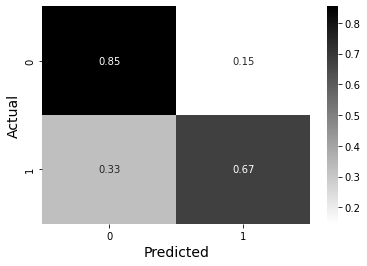

In [38]:
conf_matrix(y_train, y_approx)

In [39]:
nb_train_score = f1_score(y_train, y_approx)
nb_train_score

0.7063339731285988

In [40]:
y_pred = nb.predict(X_test)

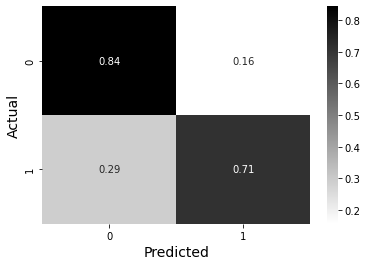

In [41]:
conf_matrix(y_test, y_pred)

In [42]:
nb_test_score = f1_score(y_test, y_pred)
nb_test_score

0.725925925925926

## 8. Метод опорных векторов

In [43]:
svm = SVC()

In [44]:
svm.fit(X_train, y_train)

SVC()

In [45]:
y_approx = svm.predict(X_train)

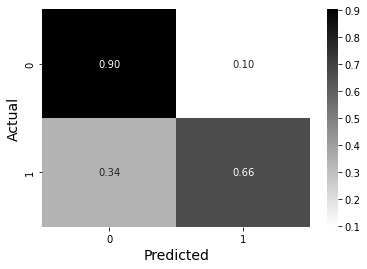

In [46]:
conf_matrix(y_train, y_approx)

In [47]:
svm_train_score = f1_score(y_train, y_approx)
svm_train_score

0.7298387096774194

In [48]:
y_pred = svm.predict(X_test)

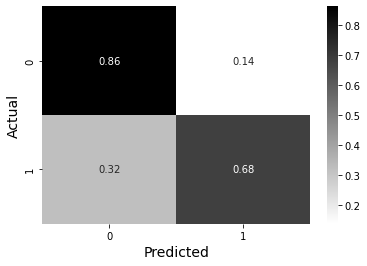

In [49]:
conf_matrix(y_test, y_pred)

In [50]:
svm_test_score = f1_score(y_test, y_pred)
svm_test_score

0.7175572519083969

## 9. Сравнение моделей

In [51]:
pd.DataFrame(
    {'Train': [knn_train_score, lr_train_score, nb_train_score, svm_train_score],
    'Test': [knn_test_score, lr_test_score, nb_test_score, svm_test_score]},
    index=['KNN', 'LogReg', 'NB', 'SVM']
)

,Train,Test
KNN,0.815238,0.753623
LogReg,0.736031,0.740741
NB,0.706334,0.725926
SVM,0.729839,0.717557
